In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv')
df.to_csv('titanic.csv',index=False)
df.head()

#df.set_index("PassengerId",inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df["Age"].fillna(value=df["Age"].mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [4]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [5]:
df_sample = df.sample(n=10, random_state=9527).drop('Name', axis=1)
df_sample.Age.fillna(int(df.Age.mean()), inplace=True)
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
182,183,0,3,male,9.000000,4,2,347077,31.3875,S
376,377,1,3,female,22.000000,0,0,C 7077,7.2500,S
659,660,0,1,male,58.000000,0,2,35273,113.2750,C
431,432,1,3,female,29.699118,1,0,376564,16.1000,S
539,540,1,1,female,22.000000,0,2,13568,49.5000,C
478,479,0,3,male,22.000000,0,0,350060,7.5208,S
791,792,0,2,male,16.000000,0,0,239865,26.0000,S
303,304,1,2,female,29.699118,0,0,226593,12.3500,Q
70,71,0,2,male,32.000000,0,0,C.A. 33111,10.5000,S


In [6]:
(df_sample.style
     .format('{:.1f}', subset='Fare')
     .set_caption('★五顏六色の鐵達尼號數據集☆')
     .hide_index()
     .bar('Age', vmin=0)
     .highlight_max('Survived')
     .background_gradient('Greens', subset='Fare')
     .highlight_null()
)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,male,35,0,0,373450,8.1,S
183,0,3,male,9,4,2,347077,31.4,S
377,1,3,female,22,0,0,C 7077,7.2,S
660,0,1,male,58,0,2,35273,113.3,C
432,1,3,female,29.6991,1,0,376564,16.1,S
540,1,1,female,22,0,2,13568,49.5,C
479,0,3,male,22,0,0,350060,7.5,S
792,0,2,male,16,0,0,239865,26.0,S
304,1,2,female,29.6991,0,0,226593,12.3,Q
71,0,2,male,32,0,0,C.A. 33111,10.5,S


In [7]:
data2 = df[['Sex', 'Survived', 'Age', 'Fare', 'Embarked']]
data2

,Sex,Survived,Age,Fare,Embarked
0,male,0,22.000000,7.2500,S
1,female,1,38.000000,71.2833,C
2,female,1,26.000000,7.9250,S
3,female,1,35.000000,53.1000,S
4,male,0,35.000000,8.0500,S
...,...,...,...,...,...
886,male,0,27.000000,13.0000,S
887,female,1,19.000000,30.0000,S
888,female,0,29.699118,23.4500,S
889,male,1,26.000000,30.0000,C


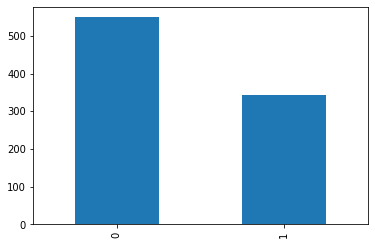

In [8]:
data2['Survived'].value_counts().plot(kind='bar')

In [9]:
data2.groupby(['Survived', 'Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

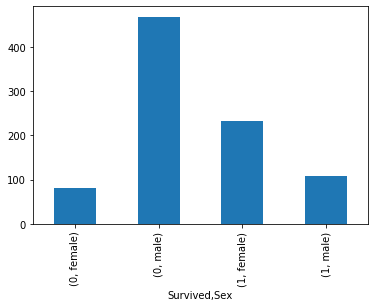

In [10]:
data2.groupby(['Survived', 'Sex']).size().plot(kind='bar')

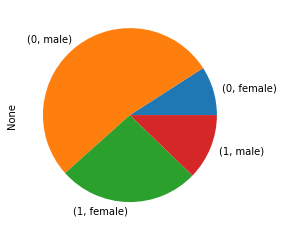

In [11]:
data2.groupby(['Survived', 'Sex']).size().plot(kind='pie')

In [12]:
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')

Sex,female,male
Survived,,
0,81,468
1,233,109


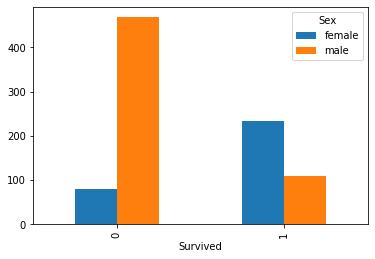

In [13]:
data2.groupby(['Survived', 'Sex']).size().unstack('Sex').plot(kind='bar')

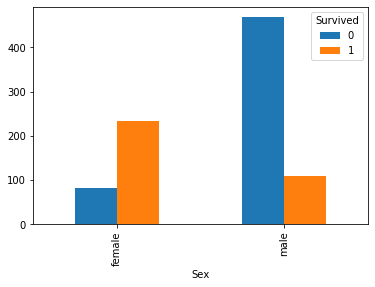

In [14]:
data2.groupby(['Survived', 'Sex']).size().unstack('Survived').plot(kind='bar')

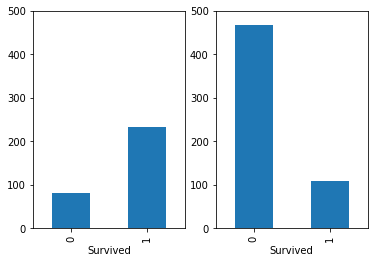

In [15]:
plt.subplot(121)
plt.ylim([0,500])
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')['female'].plot(kind='bar')
plt.subplot(122)
plt.ylim([0,500])
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')['male'].plot(kind='bar')


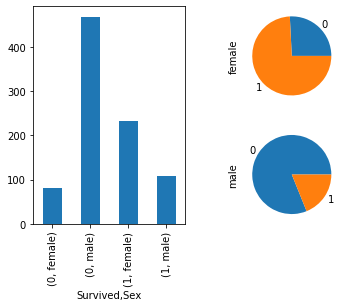

In [16]:
plt.subplot(121)
data2.groupby(['Survived', 'Sex']).size().plot(kind='bar')

plt.subplot(222)
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')['female'].plot(kind='pie')

plt.subplot(224)
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')['male'].plot(kind='pie')


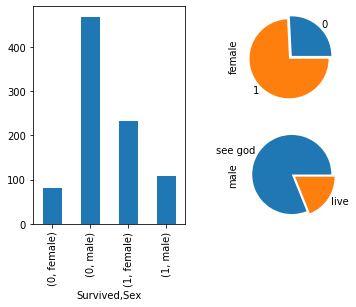

In [17]:
plt.subplot(121)
data2.groupby(['Survived', 'Sex']).size().plot(kind='bar')

plt.subplot(222)
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')['female'].plot(kind='pie', explode=[0,0.1])

plt.subplot(224)
data2.groupby(['Survived', 'Sex']).size().unstack('Sex')['male'].plot(kind='pie', explode=[0,0.1], labels=['see god','live'])


In [18]:
data2.corr()

,Survived,Age,Fare
Survived,1.000000,-0.069809,0.257307
Age,-0.069809,1.000000,0.091566
Fare,0.257307,0.091566,1.000000


In [19]:
df_sample['Age'].apply(lambda x: x>20)

4       True
182    False
376     True
659     True
431     True
539     True
478     True
791    False
303     True
70      True
Name: Age, dtype: bool

In [20]:
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
182,183,0,3,male,9.000000,4,2,347077,31.3875,S
376,377,1,3,female,22.000000,0,0,C 7077,7.2500,S
659,660,0,1,male,58.000000,0,2,35273,113.2750,C
431,432,1,3,female,29.699118,1,0,376564,16.1000,S
539,540,1,1,female,22.000000,0,2,13568,49.5000,C
478,479,0,3,male,22.000000,0,0,350060,7.5208,S
791,792,0,2,male,16.000000,0,0,239865,26.0000,S
303,304,1,2,female,29.699118,0,0,226593,12.3500,Q
70,71,0,2,male,32.000000,0,0,C.A. 33111,10.5000,S


In [21]:
d4 = data2.groupby(['Survived']).size()
d4

Survived
0    549
1    342
dtype: int64

In [22]:
data4 = data2.groupby(['Survived']).agg(['size', 'mean'])
data4

Age            Fare           
         size       mean size       mean
Survived                                
0         549  30.415100  549  22.117887
1         342  28.549778  342  48.395408

In [23]:
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
182,183,0,3,male,9.000000,4,2,347077,31.3875,S
376,377,1,3,female,22.000000,0,0,C 7077,7.2500,S
659,660,0,1,male,58.000000,0,2,35273,113.2750,C
431,432,1,3,female,29.699118,1,0,376564,16.1000,S
539,540,1,1,female,22.000000,0,2,13568,49.5000,C
478,479,0,3,male,22.000000,0,0,350060,7.5208,S
791,792,0,2,male,16.000000,0,0,239865,26.0000,S
303,304,1,2,female,29.699118,0,0,226593,12.3500,Q
70,71,0,2,male,32.000000,0,0,C.A. 33111,10.5000,S


In [24]:
df_sample['teen'] = df_sample['Age'].apply(lambda x: x>20)
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,teen
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,True
182,183,0,3,male,9.000000,4,2,347077,31.3875,S,False
376,377,1,3,female,22.000000,0,0,C 7077,7.2500,S,True
659,660,0,1,male,58.000000,0,2,35273,113.2750,C,True
431,432,1,3,female,29.699118,1,0,376564,16.1000,S,True
539,540,1,1,female,22.000000,0,2,13568,49.5000,C,True
478,479,0,3,male,22.000000,0,0,350060,7.5208,S,True
791,792,0,2,male,16.000000,0,0,239865,26.0000,S,False
303,304,1,2,female,29.699118,0,0,226593,12.3500,Q,True
70,71,0,2,male,32.000000,0,0,C.A. 33111,10.5000,S,True


In [26]:
df_sample['teen'] = df_sample['Age'].apply(lambda x: x>20)
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,teen
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,True
182,183,0,3,male,9.000000,4,2,347077,31.3875,S,False
376,377,1,3,female,22.000000,0,0,C 7077,7.2500,S,True
659,660,0,1,male,58.000000,0,2,35273,113.2750,C,True
431,432,1,3,female,29.699118,1,0,376564,16.1000,S,True
539,540,1,1,female,22.000000,0,2,13568,49.5000,C,True
478,479,0,3,male,22.000000,0,0,350060,7.5208,S,True
791,792,0,2,male,16.000000,0,0,239865,26.0000,S,False
303,304,1,2,female,29.699118,0,0,226593,12.3500,Q,True
70,71,0,2,male,32.000000,0,0,C.A. 33111,10.5000,S,True
